# CA2-Static Data Visualization

The packages that are used answer the questions given and make appealing graphs.

In [1]:
import pandas as pd
import seaborn as sns
from numpy import median, mean
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In this step I am reading in the data from the file to a variable name and using head function to have a look at what data I have.

In [2]:
NamesByDecade = pd.read_csv('data/us-names-by-decade.csv')
NamesByDecade.head(5)

,gender,name,decade,count
0,F,Sophia,2010,85720
1,M,Jacob,2010,79359
2,F,Isabella,2010,79238
3,F,Emma,2010,77736
4,M,Mason,2010,70808


<h3>Question 1:</h3> Generate a plot that details the top 5 number of Names for each of the Decades. 

So for this task, I will group by decade and then in order of biggest to lowest.

In [3]:
func = lambda x: (x[2],x[3]);
sorted(NamesByDecade, key = func);

Then I will loop through the decades to get the top 5 names because it is already sorted to be in sequence.

In [4]:
VaulesList = []
tryAnother = []
LowestYear = NamesByDecade.decade[0]
for year in NamesByDecade.decade:
    if year < LowestYear:
        LowestYear =  year
        VaulesList.append(year)
for year in VaulesList:
    newList = NamesByDecade.loc[(NamesByDecade["decade"] == year)]  
    tryAnother.append(newList.head(5))

Now I sort out the array into a singular DataFrame that I can use to graph with.

In [5]:
df_list = []
for i in tryAnother:
    df = pd.DataFrame(i)
    df_list.append(df)
df = pd.concat(df_list)

Then I used a swarmplot to show off each decade and how their count compares because there are some names used over many decades which appear a few times. Also part of the reason why i use this graph is tried many other graphs and I found other graphs very larg and hard to see. Find this best to get a lot of information into a graph.

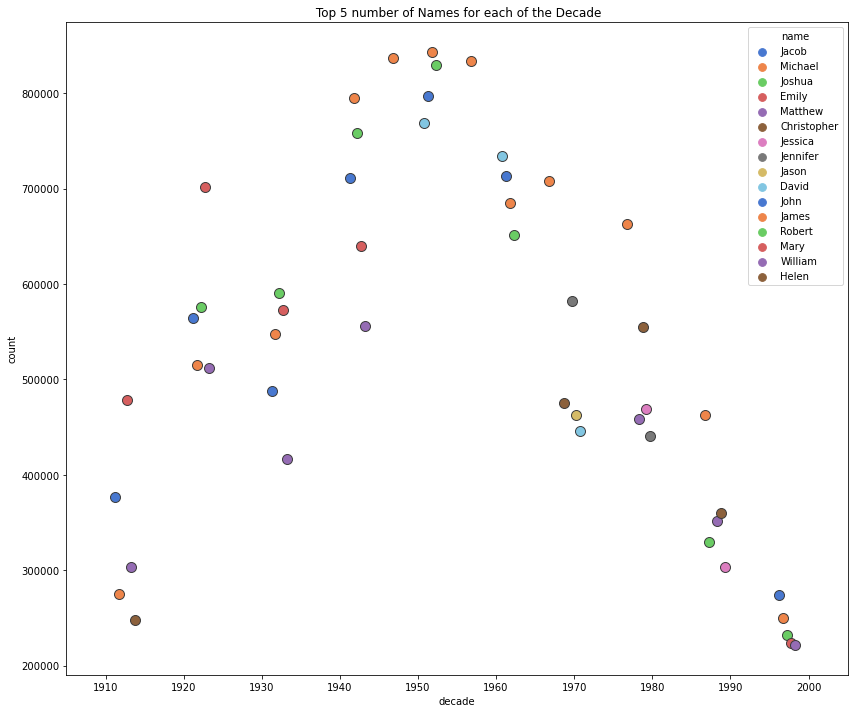

In [6]:
plt.figure(figsize=(14, 12))
df.reset_index()
graph4 = sns.swarmplot(x="decade", y="count", hue="name",data=df,palette="muted",dodge=True, size=10,linewidth=1 )
graph4.set(title=' Top 5 number of Names for each of the Decade');

From the graph, we can see how different names go up or down or might appear only once because there are only 16 unique names in the top 5 throughout the decades.

I used the muted palette because I find it already a bit noisy and bright colors only add to the confusion.

<h3>Question 2: </h3>Plot a graph depicting the distribution of the Names that are Female in decade
1980.

The first step is getting the data by the paramater of being female and in the dacade of 1980 using loc to pick out the information.

In [7]:
FemaleNamesIn1980 = NamesByDecade.loc[(NamesByDecade["gender"] == "F") & (NamesByDecade["decade"] == 1980)];
FemaleNamesIn1980.head(5);

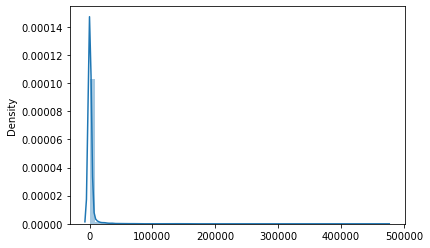

In [8]:
TotalsOfFemalsIn1980 = FemaleNamesIn1980["count"].values
graph1 = sns.distplot(TotalsOfFemalsIn1980)

When we graph this it gives us little bit more knowledge but can be hard to understand because there are such extremes in a few really big name counts and a large amount of names with a very low count. So to fix this I put it through log a function to help normalise the data to try to give more information.

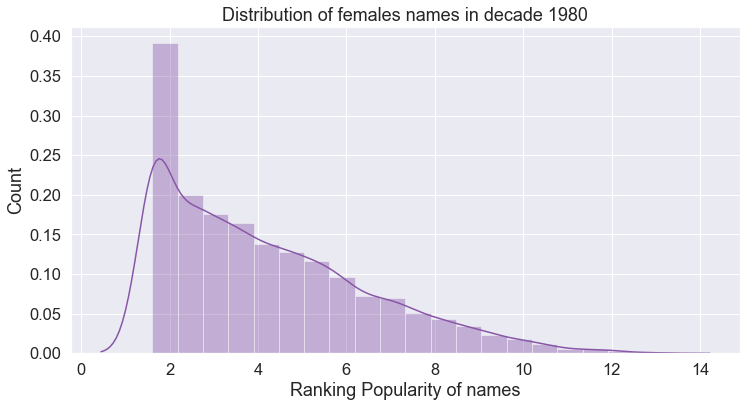

In [9]:
sns.set_palette("muted");
sns.set(font_scale=1.5);
plt.figure(figsize=(12, 6));
graph2 = sns.distplot(np.log(TotalsOfFemalsIn1980), kde=True, bins= 20, color = "#8856a7");
graph2.set(title='Distribution of females names in decade 1980', xlabel="Ranking Popularity of names", ylabel="Count");


I use a distribution plot to show the spread of the names compared to the count so that it is easy to see the highs and lows and we can see the graph skews strongly to the right. 

The reason for the muted palette is to clearly show the data but have a female look to it with the purple color to help represent the group and for quicker understanding  of who we are talking about.

<h3>Question 3: </h3>Find out and visualize which decade had the MOST names:

I need to gather the count of all the names in each decade and group them up together. So I will be using the groupby function to achieve this.

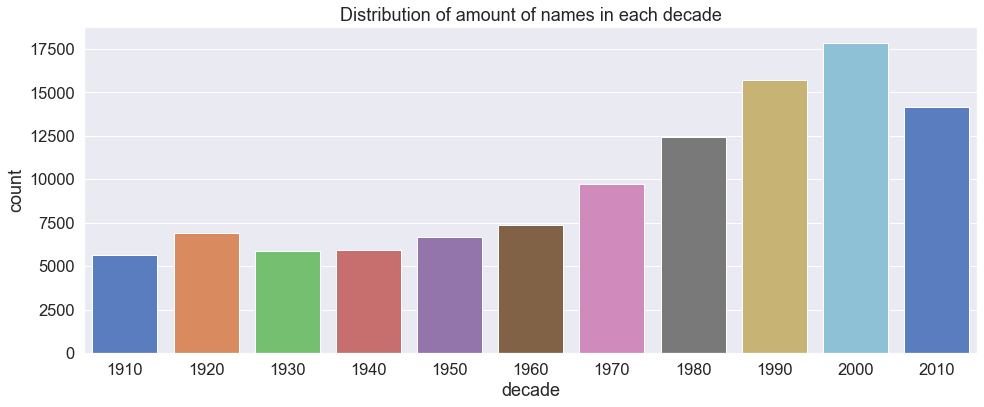

In [10]:
CountOfNames = NamesByDecade.groupby('decade')['count'].count()
FixedCountOfNames= CountOfNames.reset_index()
plt.figure(figsize=(16, 6))
sns.set(font_scale=1.5)
graph3 = sns.barplot(x="decade", y="count", data=FixedCountOfNames,palette="muted",capsize=18)
graph3.set(title='Distribution of amount of names in each decade');


I use a bar chart because it is easy to show the difference between the amount in each decade to each other but I like the get more from this graph and to see if they're also true between the sexes.

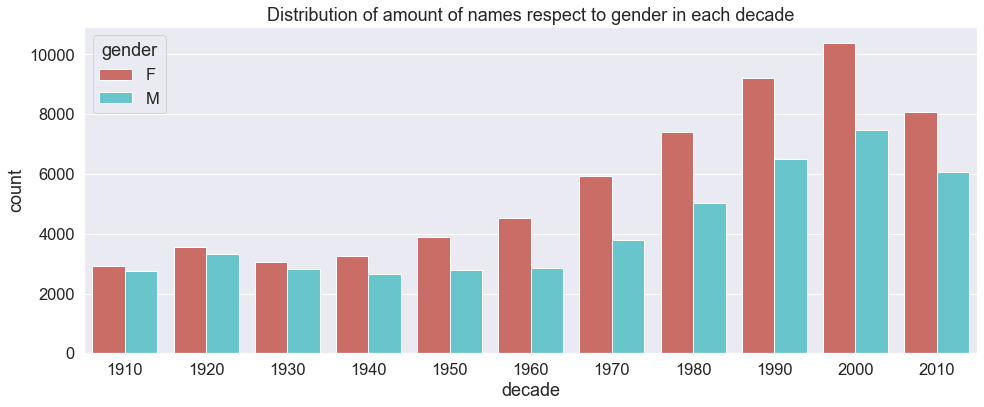

In [11]:
GenderCount = NamesByDecade.groupby(by=["decade" , "gender"])['count'].count()
FixedGenderCount= GenderCount.reset_index()
sns.set(font_scale=1.5)
plt.figure(figsize=(16, 6))
graph4 = sns.barplot(x="decade", y="count", hue="gender", data=FixedGenderCount,palette="hls",dodge=True)
graph4.set(title='Distribution of amount of names respect to gender in each decade');

I am using the hue function to show off the difference between the sexes to their amount with in their decade and with this, an interesting fact appears. You can see the start of World War Two in 1939 where the difference between sexes changed dramatically and never quite balanced out again but it does seem to be coming closer together. 

I am also using the hls palette because I believe it gives a good contrast between the genders.

<h3>Question 4: </h3> Observe and visualize the average number of names per decade:

So this question is similar to the other groupby question but now we need the mean (the average) of each decade. I do this by adding the mean function at the end.

In [12]:
AverPerDec = NamesByDecade.groupby('decade')['count'].mean()
FixedAverPerDec= AverPerDec.reset_index()

Important note: you need to reset the index of the data after this.

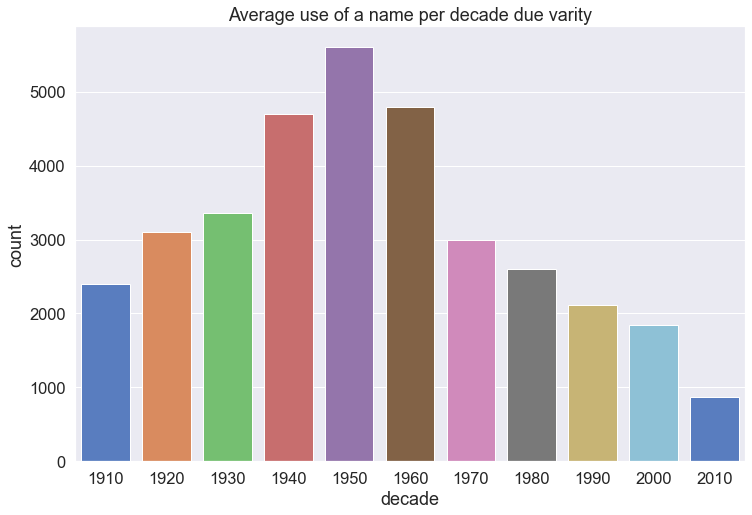

In [13]:
plt.figure(figsize=(12, 8))
graph5 = sns.barplot(x="decade", y="count", data=FixedAverPerDec,palette="muted" )
graph5.set(title='Average use of a name per decade due varity');

I am using a muted palette again to keep it all consistent because changing the colors a lot feel unprofessional and jarring to the eye. A bar chart makes it easy to compare the decades to each other.

This chart shows us that with an increase in population the variety of names also increases. Therefore the average amount of a  name being used decreases.